In [1]:
import MSA_entropy_plot as ali
import exon_changes as ex


# ALGORITHM

### Function `align_sequences_to_msas`
**Input**:
- `input_file` (str): Path to the file containing the sequences in FASTA format to be analyzed.
- `msa1_path` (str): Path to the file containing the first Multiple Sequence Alignment (MSA) in FASTA format.
- `msa2_path` (str): Path to the file containing the second MSA in FASTA format.
- `output_dir` (str): Path to the directory where the results will be saved.
- `iterations` (int): Number of iterations for aligning the sequences.

**Output**:
- No direct return; the modified MSAs and undecided sequences are written to files in `output_dir`.

**Role**:
This function loads two MSAs and a set of sequences. It calculates important positions between the MSAs based on Kullback-Leibler divergence, constructs presence matrices for each MSA, assigns scores to sequences based on these matrices, and distributes the sequences between the two MSAs or marks them as undecided. These steps are repeated for the specified number of iterations, and the results are recorded in files.

### Function `find_important_positions_with_weights`
**Input**:
- `msa1` (MultipleSeqAlignment): First multiple sequence alignment.
- `msa2` (MultipleSeqAlignment): Second multiple sequence alignment.

**Output**:
- `important_positions` (dict): Dictionary of important positions with weights (average of two asymmetric entropies)

**Role**:
Calculates and returns important positions between two MSAs using the Kullack-Leibler divergence for each position. Positions with high divergences are considered important and receive a weight, influencing the analysis of sequences when compared to these MSAs.

### Function `calculate_presence_matrix`
**Input**:
- `alignment` (MultipleSeqAlignment): An MSA from which to calculate the matrix.
- `position_weights` (dict): Dictionary of weights for important positions in the MSA.

**Output**:
- `presence_matrix` (np.array): Presence matrix of amino acids in the MSA, weighted by important positions.

**Role**:
This function constructs a matrix describing the relative frequency of each amino acid at each position in the MSA, adjusted by the weights of the important positions. This matrix is essential for evaluating how much amino acids are conserved or vary across sequences.

### Function `calculate_sequence_score`
**Input**:
- `sequence` (Seq): Sequence to evaluate.
- `presence_matrix` (np.array): Presence matrix from `calculate_presence_matrix`.
- `amino_acids` (str): String of considered amino acids.

**Output**:
- `score` (float): Score of the sequence based on its concordance with the presence matrix.

**Role**:
Evaluates an individual sequence by calculating a score based on its correspondence with the presence matrix. This score is used to determine whether the sequence better matches the first or second MSA.

### Function `calculate_kl_divergence`
**Input**:
- `p` (list): Probability distribution of the first sequence.
- `q` (a list): Probability distribution of the second sequence.

**Output**:
- `kl_divergence` (float): Kullback-Leibler divergence value of `p` relative to `q`.

**Role**:
Uses the function `rel_entr` to calculate the Kullback-Leibler divergence between two probability distributions.
`rel_entr` (source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.rel_entr.html): The function rel_entr comes from the scipy.special library and is used to calculate the relative entropy or Kullback-Leibler divergence between two probability distributions.

### Function `calculate_aa_distribution`
**Input**:
- `column` (list): List of amino acids at a certain position in the MSA.

**Output**:
- `distribution` (list): Normalized distribution of the frequencies of each amino acid.

**Role**:
Calculates the distribution of amino acid frequencies at a given position. This distribution is used to compute the Kullback-Leibler divergence between the columns of two MSAs by the function `calculate_kl_divergence`.





# Understanding the Kullback-Leibler Divergence and Its Relevance in Weighting Factors

The Kullback-Leibler (KL) divergence is a key statistical tool used to quantify how one probability distribution diverges from another, typically a baseline or reference distribution. Commonly applied across fields such as information theory, statistics, and machine learning, the KL divergence is instrumental in analyzing how the distribution of a dataset, denoted \( P \), diverges from a comparative distribution, \( Q \).

Defined mathematically, the divergence from \( P \) to \( Q \) is expressed as:

$$D_{KL}(P \parallel Q) = \sum P(i) \cdot \log\left(\frac{Q(i)}{P(i)}\right)$$

Here, \( P \) and \( Q \) represent the respective probability distributions, and the summation extends over all conceivable events \( i \) within these distributions. The formula highlights several essential characteristics of the KL divergence:

- **Asymmetry in Measurement**: The divergence $$D_{KL}(P \parallel Q)$$ is not the same as $$D_{KL}(Q \parallel P)$$. This reflects the asymmetrical "cost" of deviation, indicating that transitioning from \( P \) to \( Q \) incurs a different "cost" than moving from \( Q \) to \( P \).

- **Zero Divergence Interpretation**: When \( P \) perfectly matches \( Q \), the KL divergence reaches zero, indicating no discrepancy between the distributions. Conversely, larger values signify greater deviations between \( P \) and \( Q \), highlighting substantial differences.

- **Non-negative Values**: The value of $$D_{KL}(P \parallel Q)$$ is always non-negative (\( D_{KL}(P \parallel Q) \geq 0 \)), achieving zero exclusively when \( P \) and \( Q \) are identical.











### 1/ 12 species for 12 species : x EM v Thoraxe


There are 9 sequences, all of length 55
There are 11 sequences, all of length 55


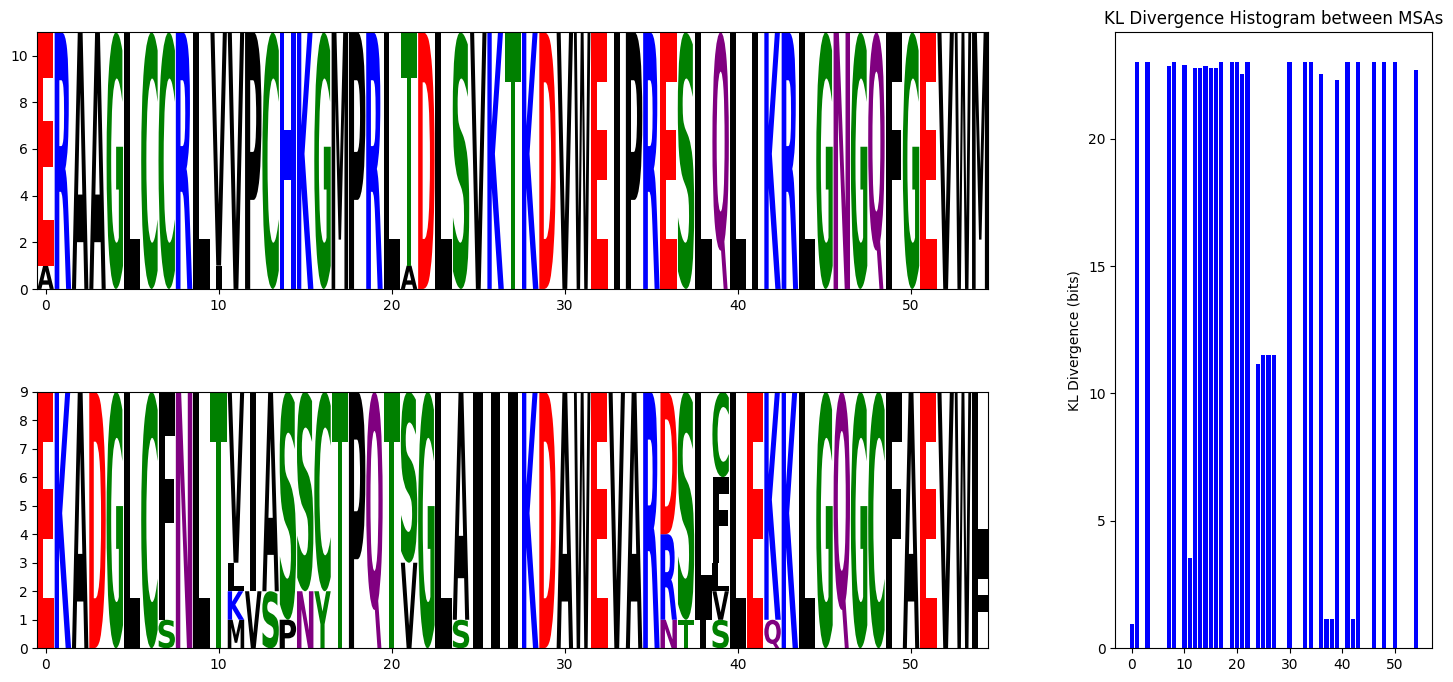

In [2]:
can = "DATA/ENSG00000010810/thoraxe/msa/msa_s_exon_5_0.fasta"
alt =  "DATA/ENSG00000010810/thoraxe/msa/msa_s_exon_5_1 copie.fasta"

ali.plot_combined_msa_analysis(can,alt)


### 2/ 100 species for 100 species : x EM v Thoraxe

There are 129 sequences, all of length 57
There are 186 sequences, all of length 57


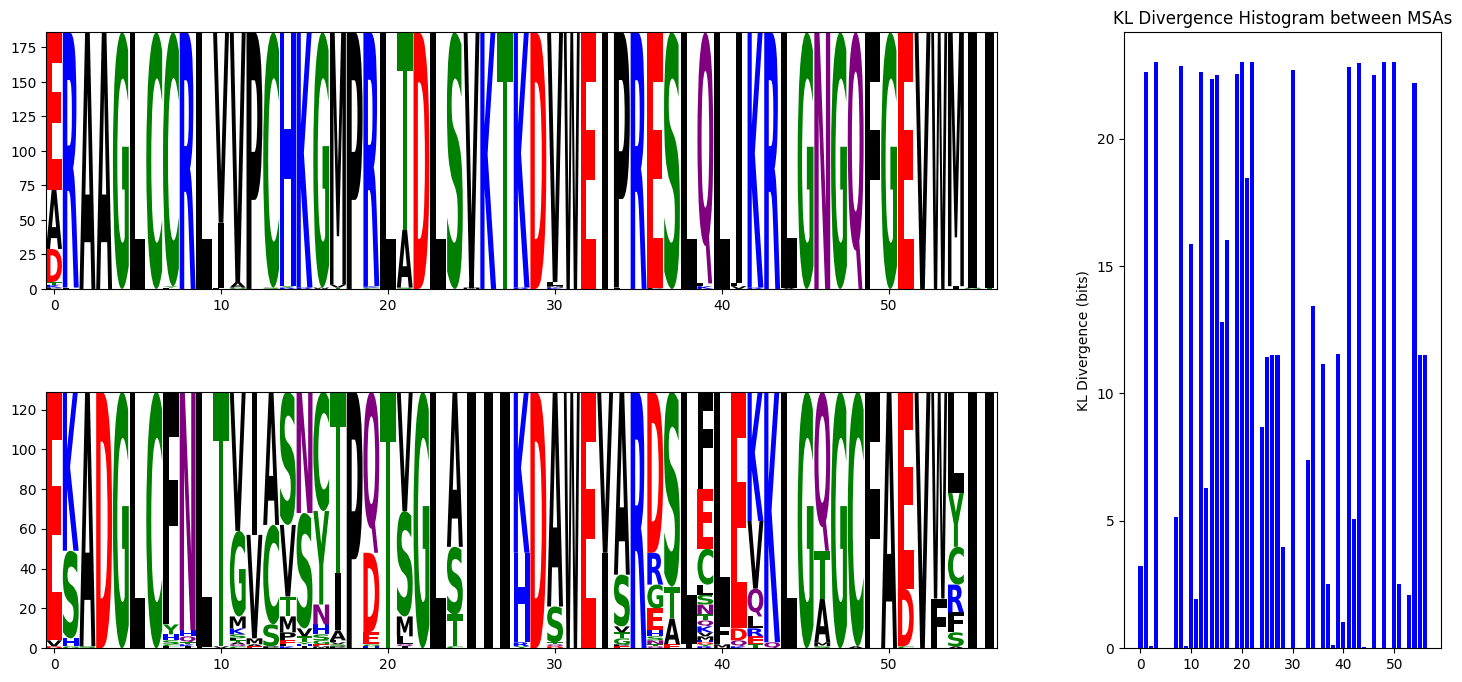

In [3]:
msa1_path = "DATA/100species/ENSG00000010810/thoraxe/msa/combined_filtered_can.fasta"
msa2_path = "DATA/100species/ENSG00000010810/thoraxe/msa/combined_filtered_alt.fasta"

ali.plot_combined_msa_analysis(msa1_path,msa2_path)


### 3/ 100 species for 12 species  : v EM v Thoraxe 

There are 138 sequences, all of length 57
There are 197 sequences, all of length 57


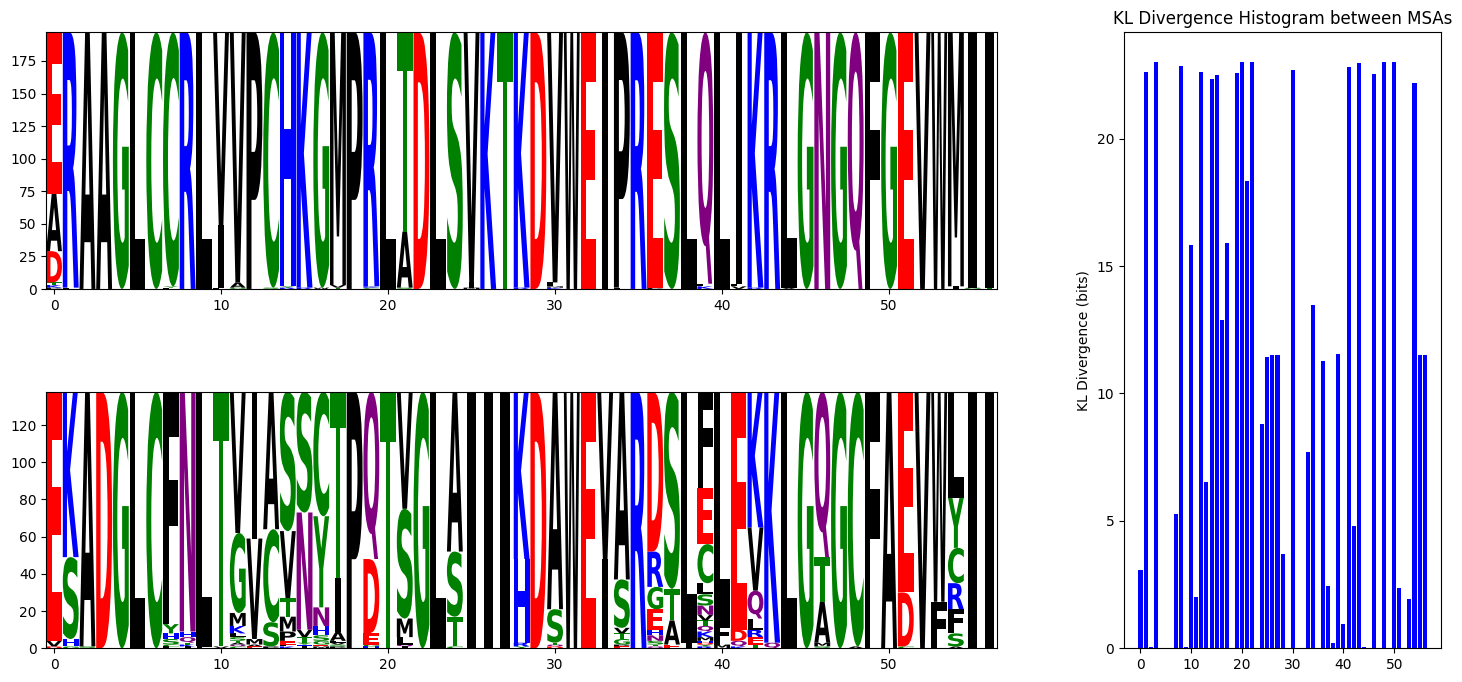

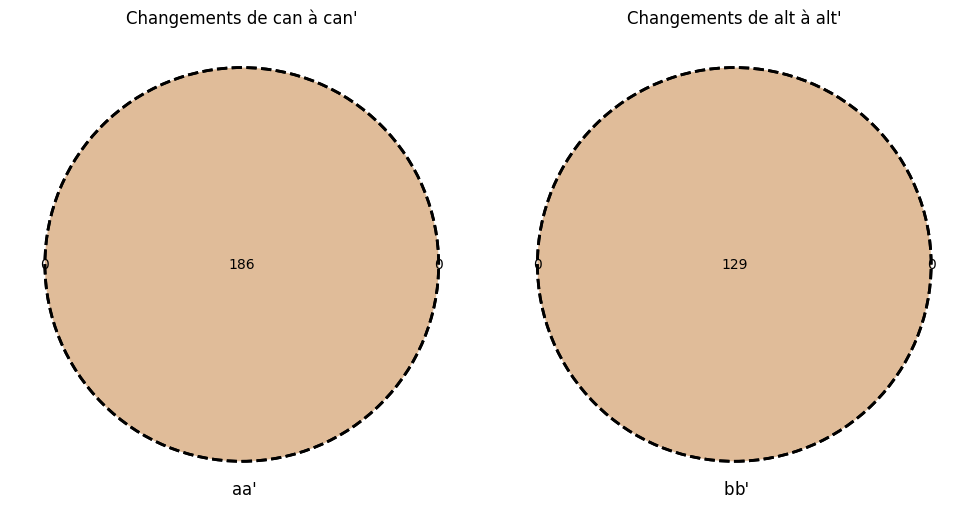

,Added to Can',Lost from Can,Added to Alt',Lost from Alt,Exchanged to Can',Exchanged to Alt'


In [4]:


msa3_path = "DATA/100species/ENSG00000010810/thoraxe/msa/can_ali_3.fasta"
msa4_path = "DATA/100species/ENSG00000010810/thoraxe/msa/alt_ali_3.fasta"


ali.plot_combined_msa_analysis(msa3_path,msa4_path)
ex.analyze_changes(msa1_path,msa2_path,msa3_path,msa4_path)

### 4/ a3m species for 12 species : v EM v Thoraxe 

There are 169 sequences, all of length 57
There are 1284 sequences, all of length 57


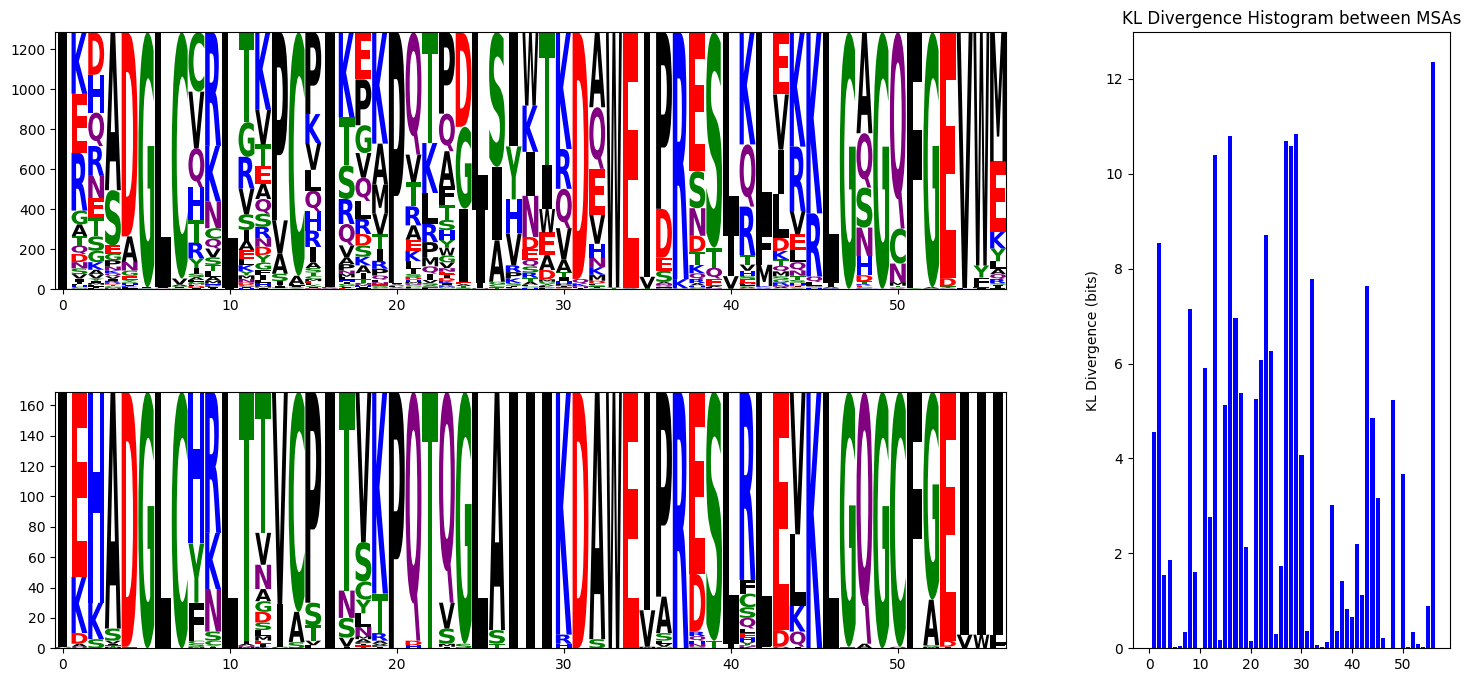

In [5]:


can = "/Users/louiscarrel/Documents/Alignement_Project/largescale_kinase/DATA/ENSG00000010810/1st_transcrit_5_0/New_alignement/excluded_alt.fasta"
alt = "/Users/louiscarrel/Documents/Alignement_Project/largescale_kinase/DATA/ENSG00000010810/1st_transcrit_5_0/New_alignement/excluded_can.fasta"


ali.plot_combined_msa_analysis(can,alt)

### 5/ a3m species for 100 species : x EM v Thoraxe 

There are 940 sequences, all of length 39
There are 832 sequences, all of length 39


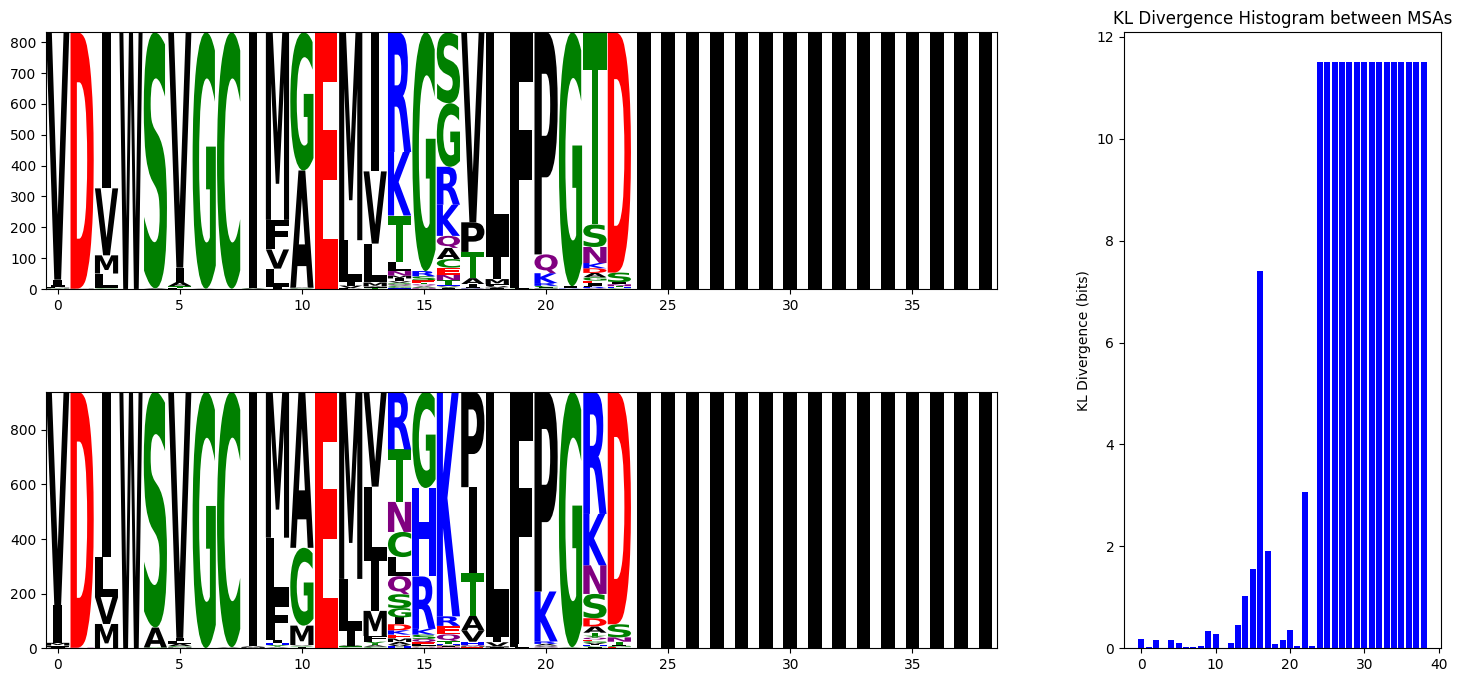

In [6]:
can = "DATA/ENSG00000107643/Analyze_logo/aligned_sequences_100/can_ali_noEM.fasta"
alt = "DATA/ENSG00000107643/Analyze_logo/aligned_sequences_100/alt_ali_noEM.fasta"

ali.plot_combined_msa_analysis(can,alt)

### 6/ a3m species for 100 species : x EM x Thoraxe 

There are 938 sequences, all of length 24
There are 851 sequences, all of length 24


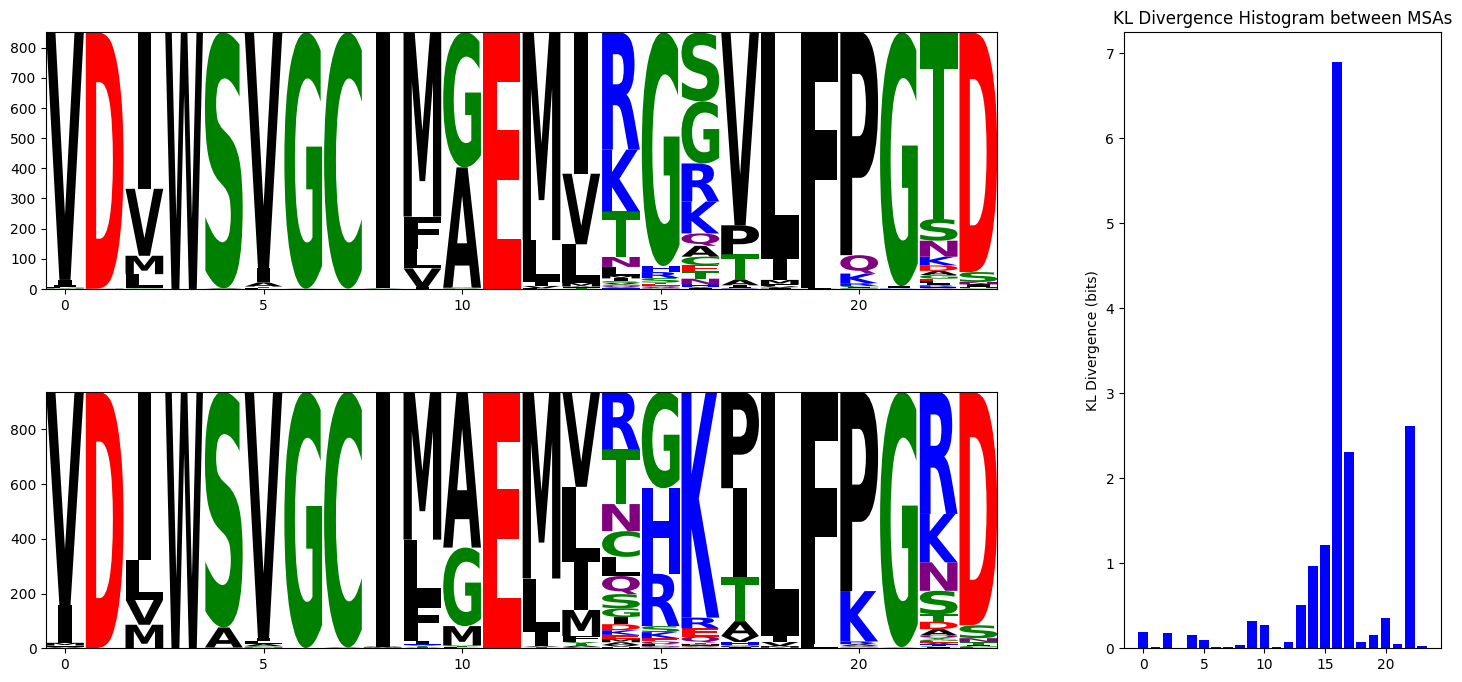

In [7]:

can = "DATA/ENSG00000107643/Analyze_logo/aligned_sequences_100_no_thoraxe/can_ali_noEM.fasta"
alt = "DATA/ENSG00000107643/Analyze_logo/aligned_sequences_100_no_thoraxe/alt_ali_noEM.fasta"

ali.plot_combined_msa_analysis(can,alt)

### 7/ a3m species for 100 species : v EM v Thoraxe 

There are 979 sequences, all of length 39
There are 775 sequences, all of length 39


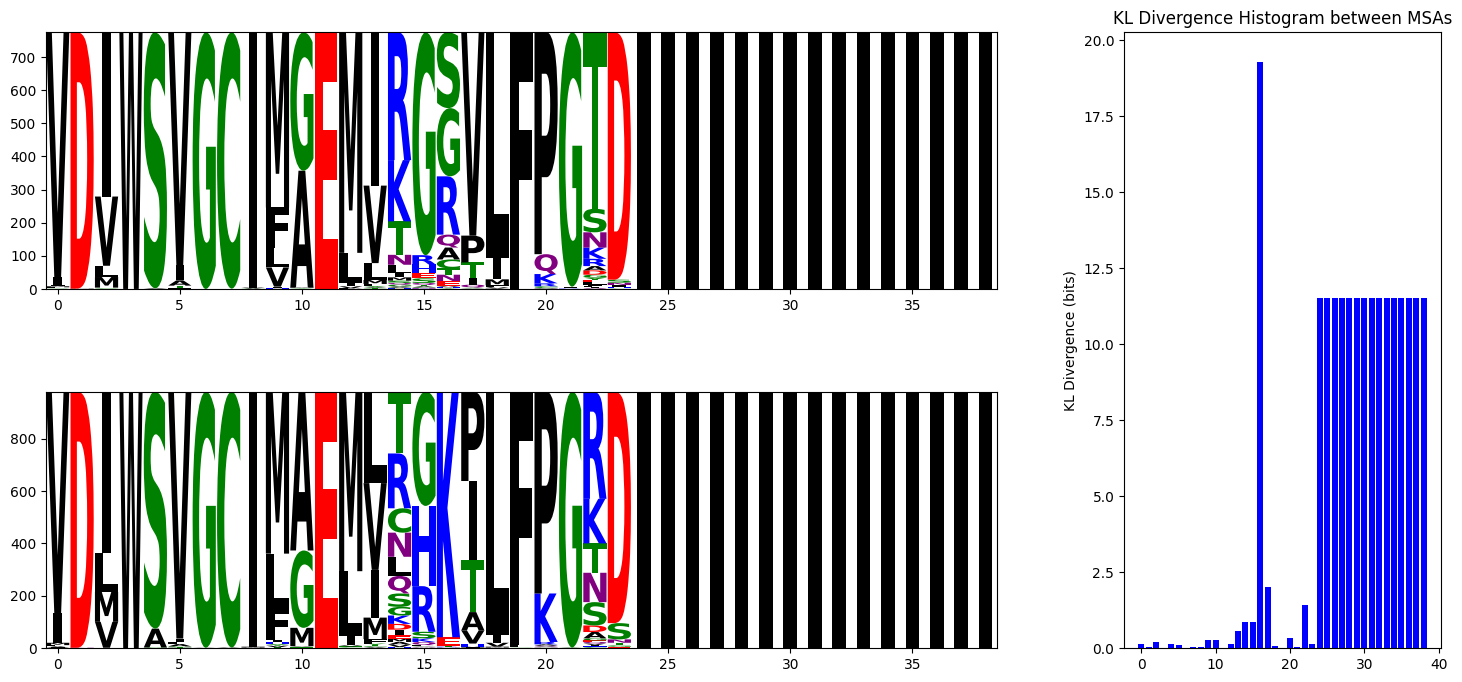

In [8]:


can = "DATA/ENSG00000107643/Analyze_logo/aligned_sequences_100/can_ali.fasta"
alt = "DATA/ENSG00000107643/Analyze_logo/aligned_sequences_100/alt_ali.fasta"

ali.plot_combined_msa_analysis(can,alt)

### 8/ a3m species for 100 species : v EM x Thoraxe 

There are 974 sequences, all of length 24
There are 778 sequences, all of length 24


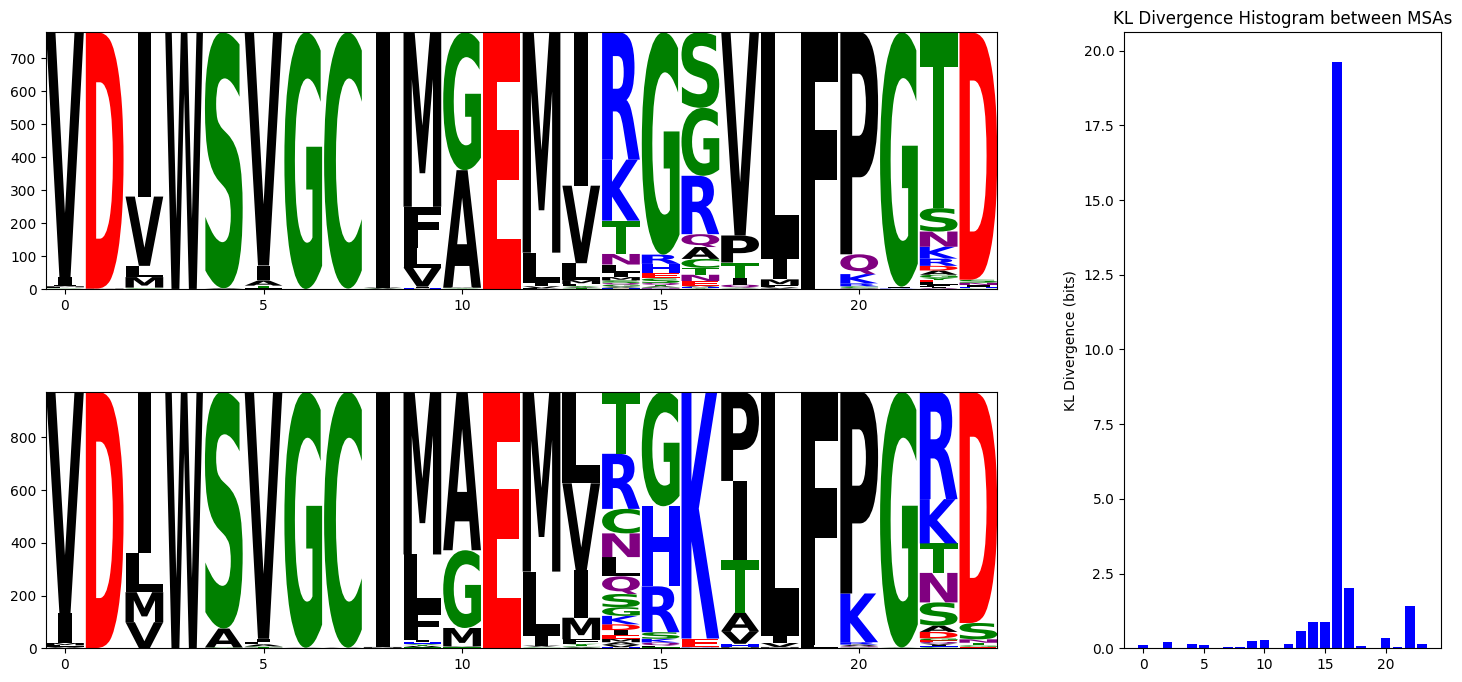

In [9]:

can = "DATA/ENSG00000107643/Analyze_logo/aligned_sequences_100_no_thoraxe/can_ali.fasta"
alt = "DATA/ENSG00000107643/Analyze_logo/aligned_sequences_100_no_thoraxe/alt_ali.fasta"

ali.plot_combined_msa_analysis(can,alt)